In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [61]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Convert to a DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [62]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [63]:

X = df.drop(columns='target')  # Feature matrix
y = df['target']  # Target variable



In [64]:
# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


X_pca shape: (178, 3)
y shape: (178,)
Clusters shape: (178,)


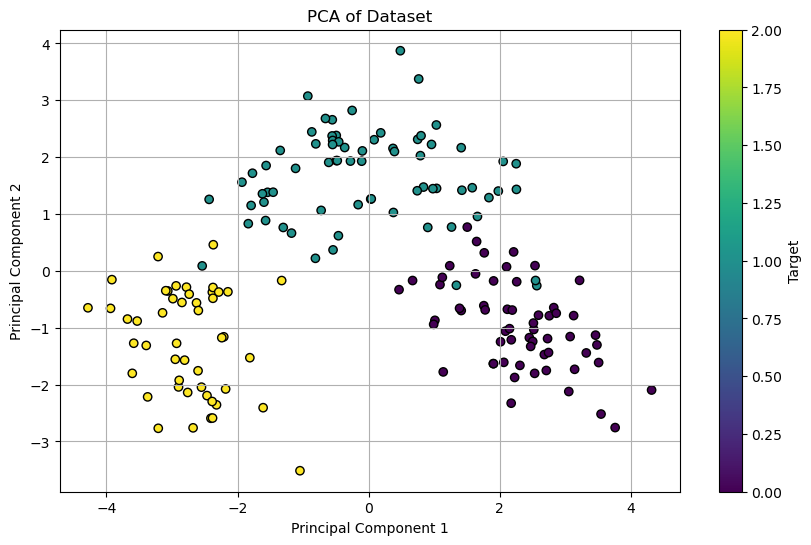

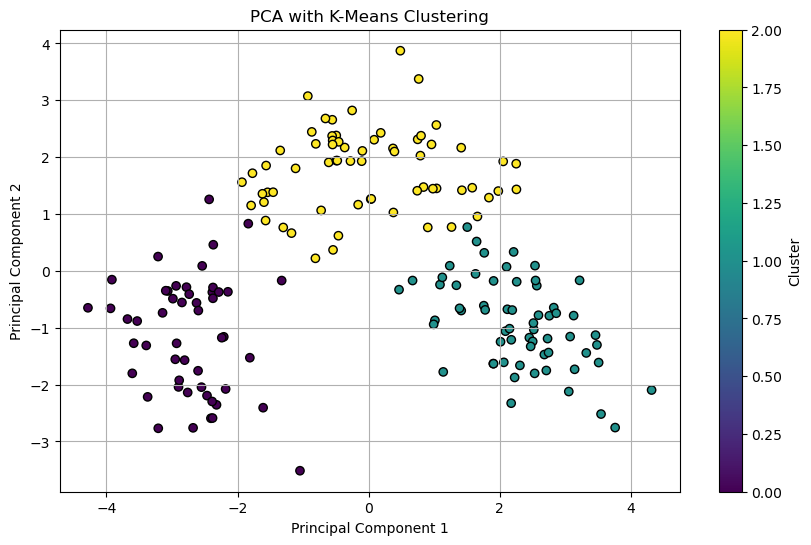

In [65]:
# Check the shapes
print(f"X_pca shape: {X_pca.shape}")
print(f"y shape: {y.shape}")
print(f"Clusters shape: {clusters.shape}")

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Target')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Plot PCA results with K-Means clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title('PCA with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
